<a href="https://colab.research.google.com/github/LiyubethG/Resumen-Ejecutivo-de-Ventas-Walmart/blob/main/S7_Version_Estudiante_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users_latam = pd.read_csv('/datasets/users_latam.csv')
usage = pd.read_csv('/datasets/usage.csv')

In [ ]:
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
users_latam.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users_latam", users_latam.shape)
print("usage", usage.shape)

plans (2, 8)
users_latam (4000, 8)
usage (40000, 6)


In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
users_latam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:
# cantidad de nulos para users
print(users_latam.isna().sum())
print(users_latam.isna().mean())

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:
# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?
- En el Dataset users encontramos las siguientes columnas con valores faltantes: city: 11.75% y churn_date: 88.35%
- En el dataset usage encontramos las siguientes columnas con valores faltantes:
date: 0.13%, duration: 55.19% y length: 44.74%
- Indica qué harías: ¿imputar, eliminar, ignorar?
- En el caso de churn_date mantengo el nulo como usuario activo
- Para el resto de las columnas por ahora las mantengo igual ya que se necesita más información ya que no podemos eliminar datos sin tener la certeza de que no afectaran el análisis mas adelante.

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
columnas_num_users_latam = users_latam[['user_id','age']]
print(columnas_num_users_latam.describe())

            user_id          age
count   4000.000000  4000.000000
mean   11999.500000    33.739750
std     1154.844867   123.232257
min    10000.000000  -999.000000
25%    10999.750000    32.000000
50%    11999.500000    47.000000
75%    12999.250000    63.000000
max    13999.000000    79.000000


- La columna `user_id` ... Haz doble clic en este bloque y escribe qué ves.
- En la columna 'user_id' podemos notar que los valores no se encuentran dispersos ni encontramos valores atipicos.
- La columna `age` notamos que se el usa el sentinel -999 para indicar valores invalidos

In [ ]:
# explorar columnas numéricas de usage
columnas_num_usage = usage[['id','user_id']]
print(columnas_num_usage.describe())

                id       user_id
count  40000.00000  40000.000000
mean   20000.50000  12002.405975
std    11547.14972   1157.279564
min        1.00000  10000.000000
25%    10000.75000  10996.000000
50%    20000.50000  12013.000000
75%    30000.25000  13005.000000
max    40000.00000  13999.000000


- Las columnas `id` y `user_id`...Haz doble clic en este bloque y escribe qué ves.
- La columna id nos muestra un min:1 y un max:40000, lo que nos muestra porque la variación estandar es tan alta, a diferencia de la columna user_id en la que notamos que los valores no estan muy dispersos.

In [ ]:
# explorar columnas categóricas de users
columnas_users_latam_cat = users_latam[['city', 'plan']]
print(columnas_users_latam_cat.describe())
users_latam['city'].unique()
users_latam['city'].value_counts(dropna=False)

          city    plan
count     3531    4000
unique       7       2
top     Bogotá  Basico
freq       808    2595


Bogotá      808
CDMX        730
Medellín    616
NaN         469
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64

- La columna `city` nos muestra lo que vimos anteriormente, tiene un porcentaje pequeño de valores faltantes, la categoria mas frecuente es la ciudad de Bogotá. Realizando un analisis más exhaustivo podemos notar que los valores ausentes estan representados diferentes, unos con NaN y otros con "?"
- La columna `plan` nos muestra que el plan mas frecuente entre los usuarios es el básico y representa poco mas del 50% de preferencia.

In [ ]:
# explorar columna categórica de usage
columnas_usage_cat = usage[['type']]
print(columnas_usage_cat.describe())

         type
count   40000
unique      2
top      text
freq    22092


- La columna `type` nos muestra que la categoria mas frecuente son los mensajes de texto con un poco mas del 50% de preferencia.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
- Encontre sentinels (-999) en la columna age y en la collumna city tenemos valores Nan y "?" como valores invalidos
- ¿Qué acción tomarías?
- En el caso de la columna age reemplazaria el sentinel -999 con NaN para habilitar funciones en los valores ausentes.
- En el caso de la columna city estandarizaría todos los valores a NaN para mantener el resto de la información relevante del dataset.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users_latam['reg_date'] = pd.to_datetime(users_latam['reg_date'], errors="coerce") # completa el código

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'], errors="coerce") # completa el código

In [ ]:
# Revisar los años presentes en `reg_date` de users

años_presentes_users_latam = users_latam['reg_date'].dt.year.value_counts().sort_index()
print(años_presentes_users_latam)


2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En 'reg_date', podemos observar que tenemos 40 registros con el año 2026, esto es un error ya que nuestros registros son hasta el año 2024.

In [ ]:
# Revisar los años presentes en `date` de usage
años_presentes_usage = usage['date'].dt.year.value_counts().sort_index()
print(años_presentes_usage)

2024.0    39950
Name: date, dtype: int64


En `date`, sólo tenemos registros en el año 2024 y tenemos 50 faltantes  
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- Tenemos 40 registros con fechas futuras (2026)
- ¿Qué harías con ellas?
- Las eliminaría (Drop) porque representan más o menos el 1% del total del dataset y el impacto, en terminos de volumen, es mínimo.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users_latam['age'].median()
users_latam['age'] = users_latam['age'].replace(-999, age_mediana)

# Verificar cambios
users_latam['age'].describe()

count    4000.000000
mean       48.122250
std        17.690408
min        18.000000
25%        33.000000
50%        47.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users_latam['city'] = users_latam['city'].replace("?", pd.NA)

# Verificar cambios
users_latam['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [ ]:
# Marcar fechas futuras como NA para reg_date
users_latam.loc[users_latam['reg_date'].dt.year==2026, 'reg_date'] = np.nan

# Verificar cambios
print(f"Valores NA en reg_date: {users_latam['reg_date'].isna().sum()}")
print(f"Rango de fechas válidas: {users_latam['reg_date'].min()} a {users_latam['reg_date'].max()}")

Valores NA en reg_date: 40
Rango de fechas válidas: 2022-01-01 00:00:00 a 2024-12-31 00:00:00


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean()

type
call    0.000000
text    0.999276
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean()

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Los valores faltantes en Duration y Length son MAR, ya que dependen sistemáticamente del tipo de comunicación: las llamadas resgistran duration pero no length, mientras que los mensajes registran length pero no dudration.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:
# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby(['user_id']).agg({
    'is_text':'sum',
    'is_call':'sum',
    'duration':'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)

,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Renombrar columnas
usage_agg.rename(columns={'is_text':'cant_mensajes','is_call':'cant_llamadas','duration':'cant_minutos_llamada'}, inplace=True)
# observar resultado
usage_agg.head(3)

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users_latam.merge(usage_agg,
                                on = 'user_id',
                                how = 'left')
user_profile.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:
# Resumen estadístico de las columnas numéricas
print(user_profile[['age','cant_mensajes','cant_llamadas','cant_minutos_llamada']].describe())

               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  4000.000000    3999.000000    3999.000000           3999.000000
mean     48.122250       5.524381       4.478120             23.317054
std      17.690408       2.358416       2.144238             18.168095
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000             11.120000
50%      47.000000       5.000000       4.000000             19.780000
75%      63.000000       7.000000       6.000000             31.415000
max      79.000000      17.000000      15.000000            155.690000


In [ ]:
# Distribución porcentual del tipo de plan
plan_porcentaje = user_profile['plan'].value_counts(normalize=True)*100
print("Distribución porcentual por tipo de Plan:")
print(plan_porcentaje)

Distribución porcentual por tipo de Plan:
Basico     64.875
Premium    35.125
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

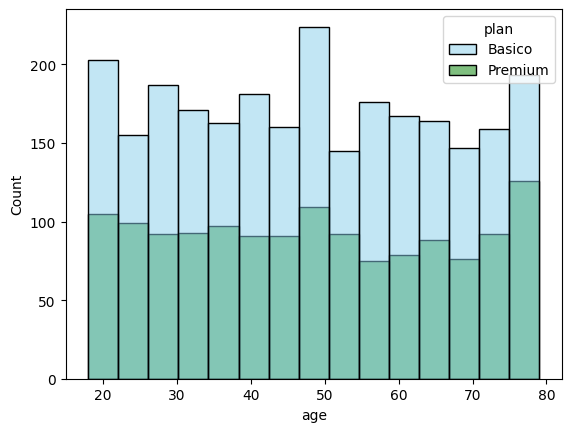

In [ ]:
# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x= 'age', bins=15, hue='plan', palette=['skyblue','green'])
plt.show()

💡Insights:
- Se puede notar un distribución más o menos simétrica en la preferencia de los planes con excepción en los rangos de edad comprendidos entre los 45 y 50 años en el que observamos un repunte en la preferencia del plan básico. Caso contrario observamos en los usuarios con edades comprendidas entre los 75 y casi 80 años que prefieren usar el plan premium.

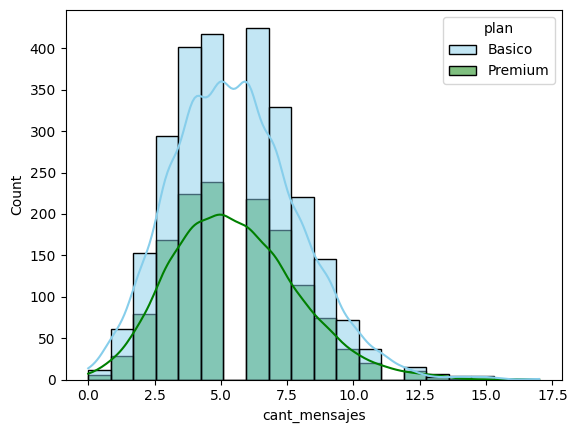

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x= 'cant_mensajes', bins=20, hue='plan', palette=['skyblue','green'], kde=True)
plt.show()

💡Insights:
- Este histograma nos muestra un leve sesgo hacia la derecha con un pick tanto en el plan Básico como en el Premium de entre 3 y 7.5 mensajes. Mientras que unos pocos envian más de 10 mensajes, sobre todo en el plan Premium.

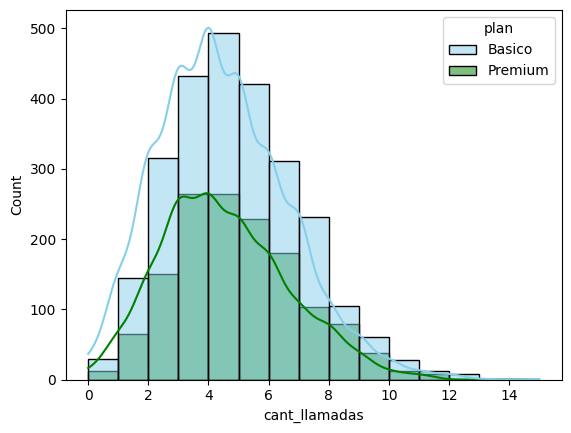

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x= 'cant_llamadas', bins=15, hue='plan', palette=['skyblue','green'], kde=True)
plt.show()

💡Insights:
- Aca tambien podemos observar un leve sesgo hacia la derecha. Observamos que los usuarios del Plan Premium tienden a realizar mas llamadas que los usuarios del plan Básico. Esto puede deberse a que a lo mejor el Plan Premium tiene un beneficio de minutos de llamdas que el Plan Básico no tiene.

<function matplotlib.pyplot.show(close=None, block=None)>

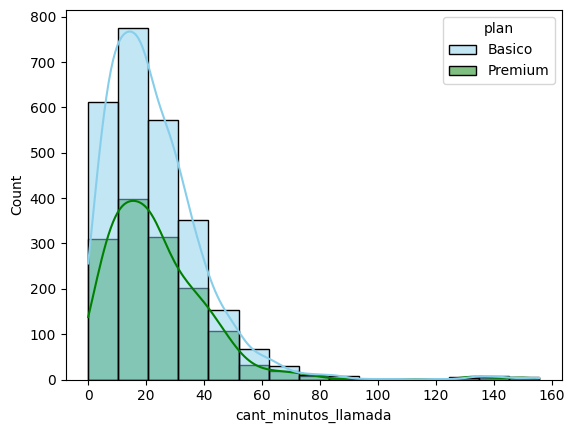

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x= 'cant_minutos_llamada', bins=15, hue='plan', palette=['skyblue','green'], kde=True)
plt.show

💡Insights:
- En la cantidad de minutos por llamadas observamos un gran sesgo hacia la derecha, el pick se concentra entre los 15 y 20 minutos por llamada tanto en el Plan Básico como en el Plan Pemium.
- La cantidad de minutos comienza a bajar despues del minuto 40 pero, podemos observar que la cantidad de minutos altos se concedntra en el Plan Premium que, en el histograma anterior tambien tenía los números más altos en la cantidad de llamadas.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

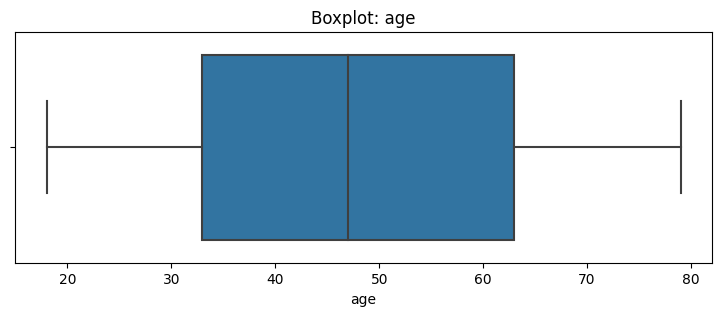

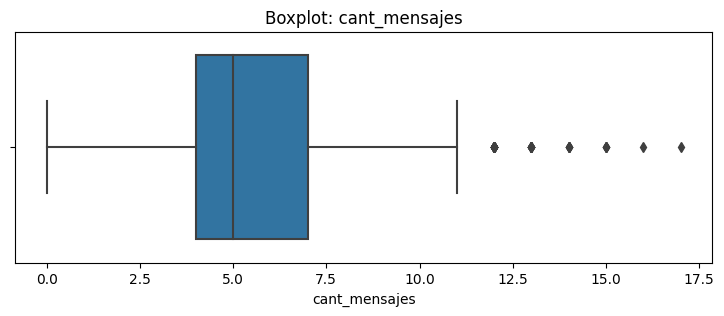

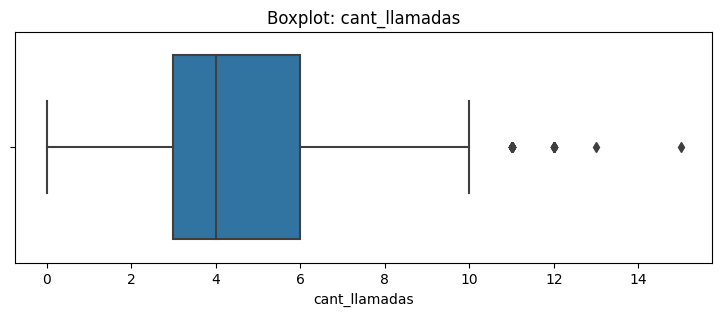

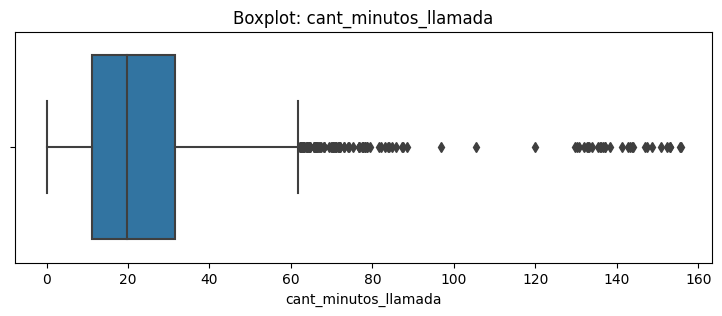

In [ ]:
# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    plt.figure(figsize = (9,3))
    sns.boxplot(x=user_profile[col])
    plt.title(f'Boxplot: {col}')

💡Insights:
- Age: no presenta outliers
- cant_mensajes: presenta valores atípicos o outliers altos pero que no estan tan alejados del máximo.
- cant_llamadas: presenta valores atípicos o outliers altos pero que no estan tan alejados del máximo.
- cant_minutos_llamada: Aca onservamos una gran catidad de outliers, que no por ser altos no sean comunes.

In [ ]:
# Calcular límites con el método IQR
columnas_limites = ['cant_mensajes','cant_llamadas','cant_minutos_llamada']
for col in columnas_limites:
    Q1 = user_profile[col].quantile(0.25)
    Q3 = user_profile[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col},IQR: {IQR}")



cant_mensajes,IQR: 3.0
cant_llamadas,IQR: 3.0
cant_minutos_llamada,IQR: 20.295


In [ ]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000
mean,5.524381,4.478120,23.317054
std,2.358416,2.144238,18.168095
min,0.000000,0.000000,0.000000
25%,4.000000,3.000000,11.120000
50%,5.000000,4.000000,19.780000
75%,7.000000,6.000000,31.415000
max,17.000000,15.000000,155.690000


💡Insights:
- cant_mensajes: mantendría los outliers porque son valores posibles.
- cant_llamadas: mantendría los outliers porque son valores posibles.
- cant_minutos_llamada: en este caso aplicaria un capping porque aunque los valores atípicos altos son posibles, son muy poco comunes y, para nuestro analisis no representan al cliente típico.

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
def grupo_uso(row):
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']
    if pd.isna(llamadas) or pd.isna(mensajes):
        return "Error Datos"
    #Segmentación Bajo uso (llamaddas<5 y mensajes<5)
    if llamadas < 5:
        if mensajes < 5:
            return "Bajo uso"
    #Segmentación Uso medio (llamadas <10 y mensajes<10)
    elif llamadas < 10:
        if mensajes < 10:
            return "Uso medio"
    #Segmentación Alto uso (resto casos)
    else:
        return "Alto uso"
#Aplicar función y ver cambios
user_profile["grupo_uso"]=user_profile.apply(grupo_uso, axis=1)

In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,None
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,None
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,None
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:
# Crear columna grupo_edad
def grupo_edad(row):
    edad = row['age']
    if pd.isna(edad):
        return "Error Datos"
    #Segmentación Joven (Edad<30)
    if edad < 30:
        return "Joven"
    #Segmentación Adulto (Edad<60)
    elif edad < 60:
        return "Adulto"
    #Segmentación Adulto Mayor (resto casos)
    else:
        return "Adulto Mayor"
#Aplicar función y ver cambios
user_profile["grupo_edad"]=user_profile.apply(grupo_edad, axis=1)


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,None,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,None,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,None,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

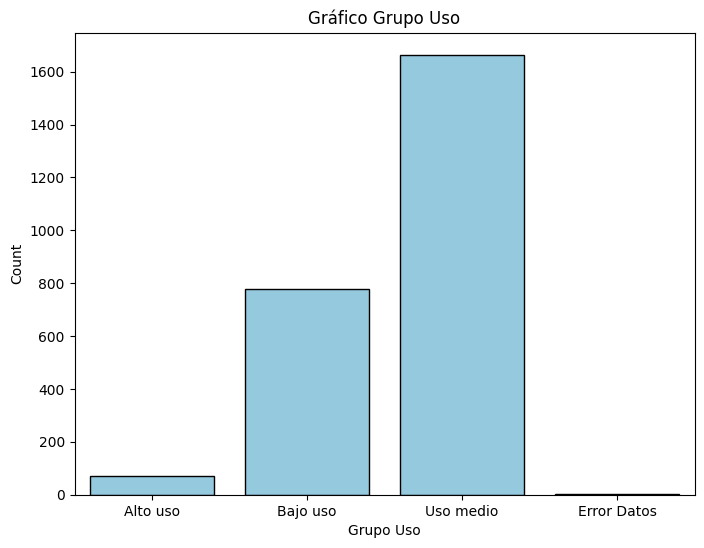

In [ ]:
# Visualización de los segmentos por uso
plt.figure(figsize=(8,6))
sns.countplot(data=user_profile,x='grupo_uso', color='skyblue', edgecolor='black')
plt.title('Gráfico Grupo Uso')
plt.xlabel('Grupo Uso')
plt.ylabel('Count')


plt.show()

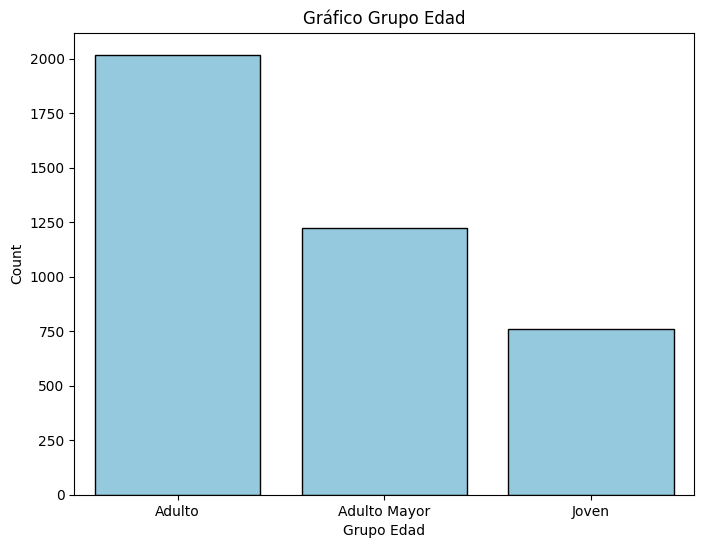

In [ ]:
# Visualización de los segmentos por edad
plt.figure(figsize=(8,6))
sns.countplot(data=user_profile,x='grupo_edad', color='skyblue', edgecolor='black')
plt.title('Gráfico Grupo Edad')
plt.xlabel('Grupo Edad')
plt.ylabel('Count')

plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?
- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
Durante la fase de exploración y limpieza se identificaron problemas relevantes de calidad de datos, principalmente asociados a valores nulos y datos inválidos:
Dataset de usuarios (users_latam):
•	Columna city: 469 valores nulos (≈11,7% de los registros), lo que limita análisis geográficos.
•	Columna churn_date: 3.534 valores nulos (≈88,3%), esperable ya que representa clientes activos; sin embargo, requiere tratamiento especial para análisis de churn.
•	Columna reg_date: se detectaron 40 fechas futuras inválidas (año 2026), las cuales fueron corregidas a valores nulos para mantener consistencia temporal.
Dataset de uso (usage):
•	duration: 22.076 valores nulos (≈55,2%), concentrados principalmente en registros que no corresponden a llamadas.
•	length: 17.896 valores nulos (≈44,7%), asociados a registros que no son mensajes.
•	date: solo un 0,12% de valores nulos, impacto bajo.
Conclusión:
La mayoría de los nulos no corresponden a errores críticos, sino a la naturaleza del tipo de evento (llamadas vs mensajes). Aun así, fue clave identificarlos para evitar interpretaciones incorrectas en métricas de uso.

🔍 **Segmentos por Edad**
Se identificaron segmentos claros de clientes combinando edad y nivel de uso, lo que permite entender patrones de consumo diferenciados:
Segmentación por edad:
•	Jóvenes (<30 años)
o	Mayor volumen de mensajes.
o	Uso moderado de llamadas.
•	Adultos (30–55 años)
o	Uso balanceado entre llamadas y mensajes.
o	Segmento más estable en volumen y frecuencia.
•	Seniors (>55 años)
o	Menor cantidad de mensajes.
o	Uso más intensivo de llamadas, aunque con menor frecuencia total.
Segmentación por uso:
•	Usuarios de bajo uso: consumo ocasional, potencialmente sensibles al precio.
•	Usuarios de uso medio: comportamiento estable, buen fit con planes estándar.
•	Usuarios de alto uso: concentran gran parte del consumo total.
Conclusión:
La edad influye directamente en el tipo de servicio utilizado, mientras que el nivel de uso permite distinguir oportunidades de monetización.

📊 **Segmentos por Nivel de Uso**
Los segmentos con mayor valor estratégico son:
1.	Adultos de uso medio–alto
o	Uso constante y predecible.
o	Menor probabilidad de churn.
o	Ideales para planes mensuales estables.
2.	Usuarios jóvenes de alto uso
o	Alto volumen de mensajes.
o	Oportunidad para planes digitales o ilimitados.
o	Potencial de crecimiento a largo plazo.
Conclusión:
Estos segmentos maximizan el ingreso esperado y facilitan estrategias de retención y upselling.

📊 **Patrones de uso extremo (outliers) y su implicancia**
Se detectaron outliers claros, especialmente en:
•	Minutos de llamadas: valores máximos cercanos a 155 minutos, muy por sobre el percentil 75 (~31 minutos).
•	Mensajes y llamadas: usuarios con volúmenes significativamente mayores al promedio.
Implicancias para el negocio:
•	Estos usuarios pueden:
o	Generar sobrecostos operativos si están en planes no adecuados.
o	Representar clientes premium mal segmentados.
•	También pueden indicar:
o	Uso compartido de líneas.
o	Casos corporativos no identificados.


💡 **Recomendaciones**
Con base en los hallazgos, se recomiendan las siguientes acciones:
1.	Crear planes segmentados por perfil
o	Plan joven: alto volumen de mensajes, menor énfasis en llamadas.
o	Plan adulto: balance entre llamadas y mensajes.
o	Plan senior: foco en llamadas con simplicidad operativa.
2.	Diseñar planes especiales para usuarios intensivos
o	Planes premium o ilimitados para outliers.
o	Evitar que usuarios de alto consumo saturen planes básicos.
3.	Mejorar la calidad del registro de datos
o	Validaciones de fechas al momento del alta.
o	Campos obligatorios como ciudad para análisis futuros.
4.	Estrategias de retención
o	Ofertas personalizadas para adultos de uso medio-alto.
o	Upselling progresivo para jóvenes con crecimiento de consumo.

**El análisis permitió transformar datos operativos en insights accionables, demostrando cómo la segmentación por edad y uso puede guiar decisiones estratégicas sobre planes, precios y retención, alineando la oferta de ConnectaTel con el comportamiento real de sus clientes.**

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`